In [2]:
# Import libraries
import numpy as np
import pandas as pd
# Data Visualization
import seaborn as sn
import matplotlib.pyplot as plt
# K-Means Cluster
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
from sklearn.cluster import KMeans

In [15]:
import pandas as pd

# Using raw string
file_path = r"C:\Users\charu\OneDrive\Documents\WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(r"C:\Users\charu\OneDrive\Documents\WA_Fn-UseC_-Telco-Customer-Churn.csv")


In [17]:
# Inspect Data 
df.head(2)
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})

In [18]:
# Each row represents a customer, each column contains customer’s attributes described on the column Metadata.
df.isnull().sum(axis = 0)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
print(f'This dataset contains infomation on {df.shape[0]} customers and {df.shape[1]} attributes, with NO missing values in any columns')

This dataset contains infomation on 7043 customers and 21 attributes, with NO missing values in any columns


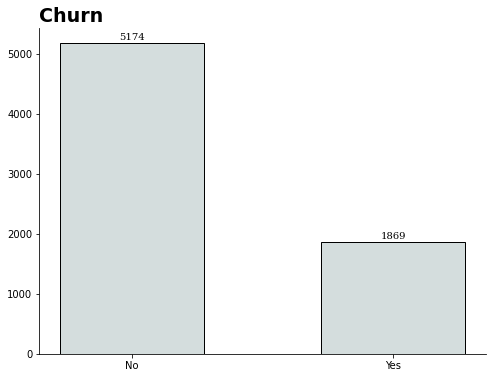

In [20]:
## Output Variable
fig, ax = plt.subplots(1,1, figsize=(8, 6))
data_temp = df['Churn'].value_counts().sort_index()
ax.bar(data_temp.index, data_temp,
          edgecolor='black', color='#d4dddd',
          width=0.55 )
ax.set_title('Churn', loc='left', fontsize=19, fontweight='bold')
for i in data_temp.index:
    ax.annotate(f"{data_temp[i]}", 
                   xy=(i, data_temp[i] + 100),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='black')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

In [22]:
def CountPlot_Table (feature):
    # Create Count Plot for Churn Vs Feature
    sn.countplot(x=feature, hue="Churn", data=df, palette="Paired", edgecolor = 'Black', order=df[feature].value_counts().index)
    sn.despine()
    # Create a plot for proportions
    temp_table = pd.DataFrame(round(df.groupby(feature)['Churn'].value_counts(normalize = True),4))
    table = plt.table(cellText=temp_table.values,
          rowLabels=temp_table.index,
          colLabels=temp_table.columns,
          bbox=(1.5, 0,0.4 , 0.45))
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    plt.show()

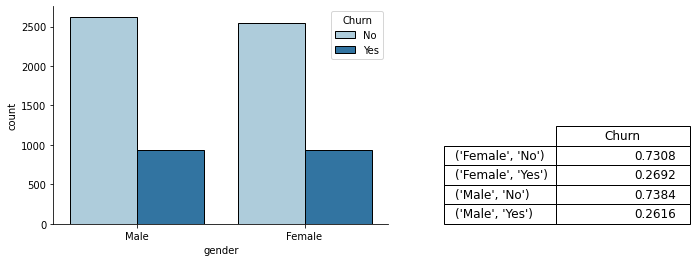

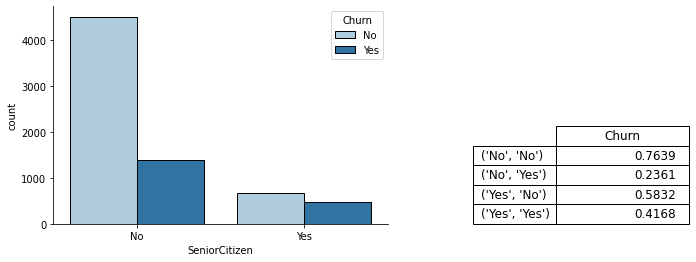

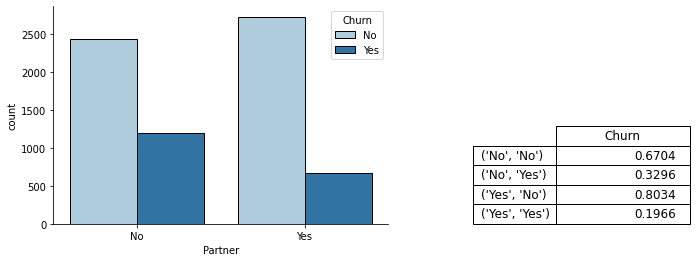

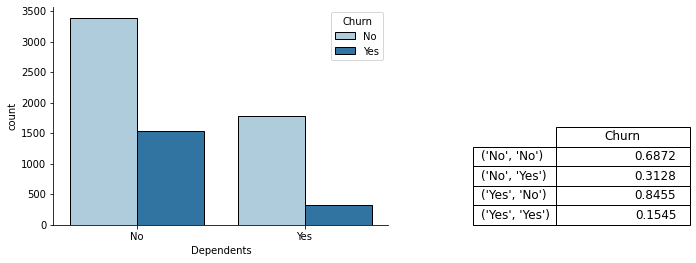

In [23]:
demo_features = ['gender','SeniorCitizen','Partner','Dependents']
for feature in demo_features:
    CountPlot_Table(feature)

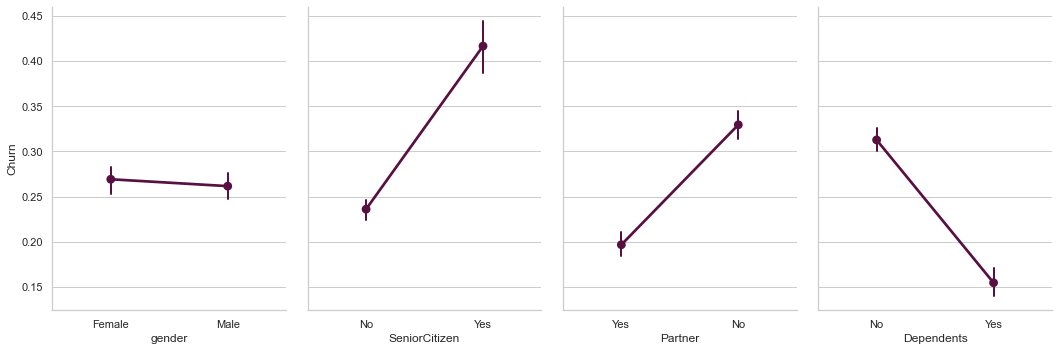

In [24]:
# Churn Rate comparision amongst demographics
df2 =df.copy()
df2["Churn"]= df2["Churn"].map({"No" : 0 , "Yes": 1})
sn.set_theme(style ='whitegrid')
g=sn.PairGrid(df2, y_vars = 'Churn',
             x_vars = ['gender','SeniorCitizen','Partner','Dependents'], height = 5, aspect =0.75)
g.map(sn.pointplot, scale = 1, errwidth =2, color = 'xkcd:plum')

In [25]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

Male_Churn = df2[df2["gender"] == 'Male'].Churn  
Female_Churn = df2[df2["gender"] == 'Female'].Churn

t_statstics = stats.ttest_ind(a= Male_Churn,
                b= Female_Churn,
                equal_var=False)    # Assume samples have equal variance?
t_statstics

TtestResult(statistic=-0.7226104987857616, pvalue=0.4699432354173566, df=7035.411941818457)

In [26]:
Dependents_No = df2[df2["Dependents"] == 'No'].Churn
Dependents_Yes = df2[df2["Dependents"] == 'Yes'].Churn

t_statstics1 = stats.ttest_ind(a= Dependents_No, b= Dependents_Yes, equal_var=False)   
print(t_statstics1)
t_statstics2 = stats.ttest_ind(a= df2[df2["Partner"] == 'No'].Churn, b=  df2[df2["Partner"] == 'Yes'].Churn, equal_var=False)   
print(t_statstics2)
t_statstics3 = stats.ttest_ind(a= df2[df2["SeniorCitizen"] == 'No'].Churn, b=  df2[df2["SeniorCitizen"] == 'Yes'].Churn, equal_var=False)   
print(t_statstics3)

TtestResult(statistic=15.409078802902004, pvalue=2.1775286391572522e-52, df=5051.620204268454)
TtestResult(statistic=12.84172504320383, pvalue=2.5291143492203677e-37, df=6972.498571100089)
TtestResult(statistic=-11.58073209133662, pvalue=9.364391561685353e-30, df=1485.975440917558)


Text(0.6, 0.92, 'Payment Method vs Churn')

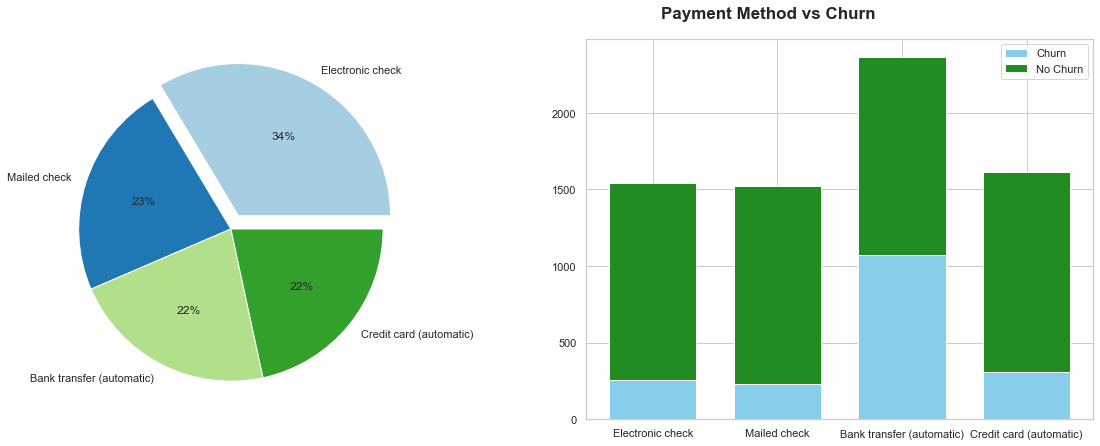

In [28]:
data = df['PaymentMethod'].value_counts()
keys = df['PaymentMethod'].unique()  
# declaring exploding pie
explode = [0.1, 0, 0, 0]
# define Seaborn color palette to use
palette_color = sn.color_palette('Paired')
# plotting data on chart

fig, ax = plt.subplots(1, 2, figsize=(20, 7))
ax[0].pie(data, labels=keys, colors=palette_color,
        explode=explode, autopct='%.0f%%')

# create data

yes_churn = [258, 232, 1071, 308]
no_churn = [1286, 1290,1294, 1304]
ax[1].bar(keys, yes_churn, label='Churn', color = 'skyblue',edgecolor='white', width = 0.7)
ax[1].bar(keys, no_churn, label='No Churn', bottom=yes_churn, color = 'forestgreen', edgecolor='white', width = 0.7)
ax[1].legend()
fig.text(0.60, 0.92, 'Payment Method vs Churn', fontsize=17, fontweight='bold') 

Text(0.45, 0.92, 'Tenure vs Churn')

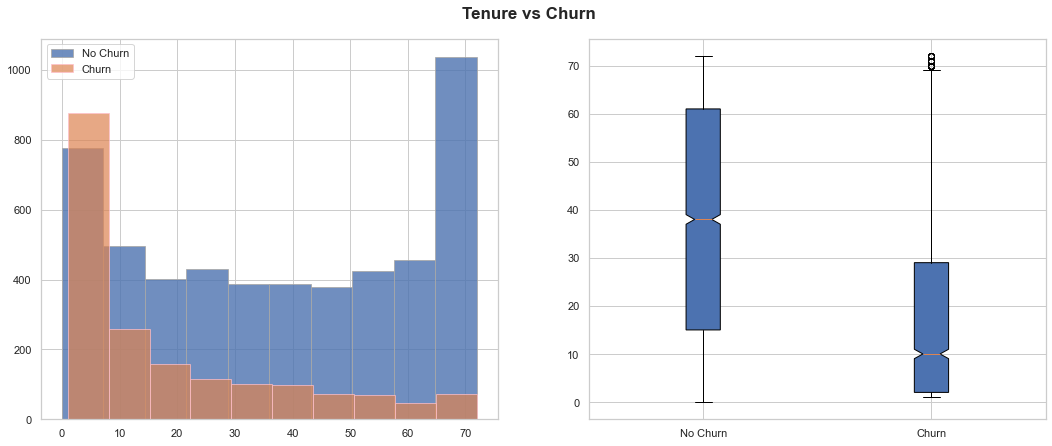

In [29]:
Churn_0 = df2[df2["Churn"] == 0]
Churn_1 = df2[df2["Churn"] == 1]
# plotting first histogram
fig, ax = plt.subplots(1, 2, figsize=(18, 7))
ax[0].hist(Churn_0.tenure, label='No Churn', alpha=.8, edgecolor='darkgrey')
# plotting second histogram
ax[0].hist(Churn_1.tenure, label='Churn', alpha=0.7, edgecolor='pink')
ax[0].legend()  

columns = [Churn_0.tenure, Churn_1.tenure]
ax[1].boxplot(columns, notch=True, patch_artist=True)
plt.xticks([1, 2], ["No Churn", "Churn"])
fig.text(0.45, 0.92, 'Tenure vs Churn', fontsize=17, fontweight='bold') 

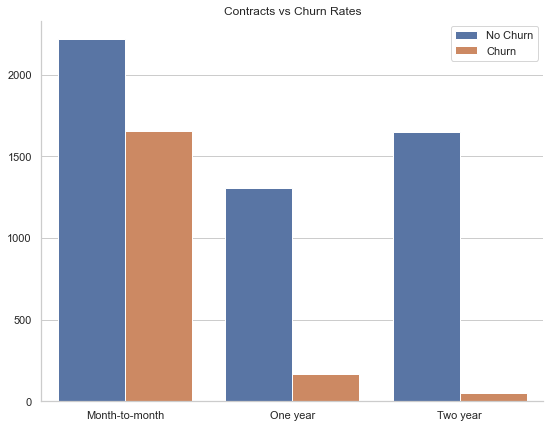

In [30]:
plt.figure(figsize=(9,7))
ax = sn.countplot(x="Contract", hue="Churn", data=df).set(title='Contracts vs Churn Rates', xlabel=None, ylabel = None)
sn.despine()
plt.legend(title='', loc='upper right', labels=['No Churn', 'Churn'])
plt.show(g)

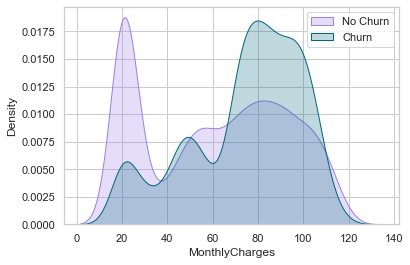

In [31]:
ax = sn.kdeplot(Churn_0.MonthlyCharges, color="#9C7FE8", shade = True)
ax = sn.kdeplot(Churn_1.MonthlyCharges, color="#00677C", shade = True)
ax.legend(["No Churn","Churn"],loc='upper right')

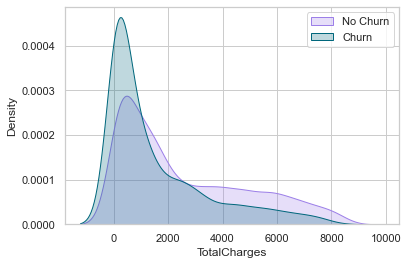

In [32]:
# Total Charges
pd.set_option('mode.chained_assignment', None)
Churn_0['TotalCharges'] = pd.to_numeric(Churn_0['TotalCharges'],errors = 'coerce')
Churn_1['TotalCharges'] = pd.to_numeric(Churn_1['TotalCharges'],errors = 'coerce')

ax = sn.kdeplot(Churn_0.TotalCharges, color="#9C7FE8", shade = True)
ax = sn.kdeplot(Churn_1.TotalCharges, color="#00677C", shade = True)
ax.legend(["No Churn","Churn"],loc='upper right')

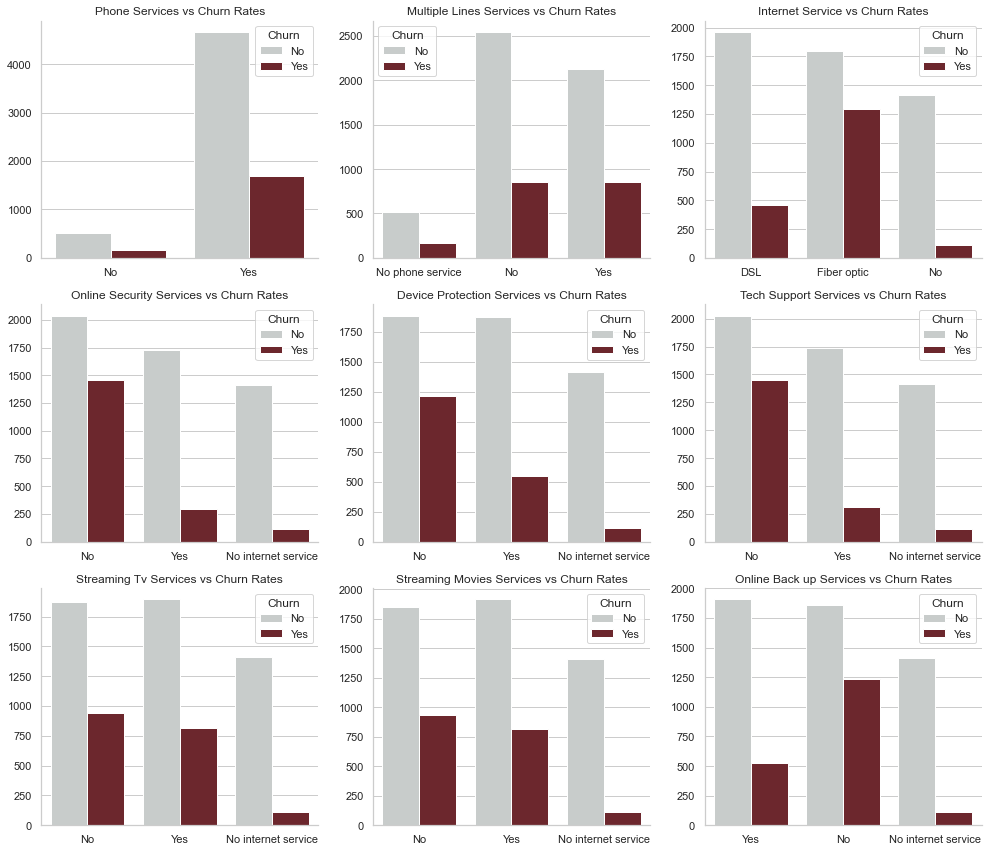

In [33]:
#which services lack of services causes the most churning 
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14,12))
# Gray for No Churn, highlight Churn!
colors = ["#C7CDCB", "#781B24"]
# Set custom color palette
sn.set_palette(sn.color_palette(colors))
# Graphing
sn.countplot(x="PhoneService", hue="Churn", data=df, ax=axes[0,0]).set(title='Phone Services vs Churn Rates', xlabel=None, ylabel = None)
sn.countplot(x="MultipleLines", hue="Churn", data=df, ax=axes[0,1]).set(title='Multiple Lines Services vs Churn Rates', xlabel=None, ylabel = None)
sn.countplot(x="InternetService", hue="Churn", data=df, ax=axes[0,2]).set(title='Internet Service vs Churn Rates', xlabel=None, ylabel = None)
sn.countplot(x="OnlineSecurity", hue="Churn", data=df, ax=axes[1,0]).set(title='Online Security Services vs Churn Rates', xlabel=None, ylabel = None)
sn.countplot(x="DeviceProtection", hue="Churn", data=df, ax=axes[1,1]).set(title='Device Protection Services vs Churn Rates', xlabel=None, ylabel = None)
sn.countplot(x="TechSupport", hue="Churn", data=df, ax=axes[1,2]).set(title='Tech Support Services vs Churn Rates', xlabel=None, ylabel = None)
sn.countplot(x="StreamingTV", hue="Churn", data=df, ax=axes[2,0]).set(title='Streaming Tv Services vs Churn Rates', xlabel=None, ylabel = None)
sn.countplot(x="StreamingMovies", hue="Churn", data=df, ax=axes[2,1]).set(title='Streaming Movies Services vs Churn Rates', xlabel=None, ylabel = None)
sn.countplot(x="OnlineBackup", hue="Churn",data=df, ax=axes[2,2]).set(title='Online Back up Services vs Churn Rates', xlabel=None, ylabel = None)
sn.despine()
plt.tight_layout()
plt.show()

In [34]:
## 1) Prepare Data
df_cluster = df.copy()
df_cluster = df_cluster.drop(['customerID', 'TotalCharges'], axis=1)
## Scale Tenure and Monthly Charges
scaler = StandardScaler()
df_cluster[['tenure', 'MonthlyCharges']] = scaler.fit_transform(df_cluster[['tenure', 'MonthlyCharges']])

#Selecting all variables except tenure and Monthly Charges
df_cluster[df_cluster.columns[~df_cluster.columns.isin(['tenure','MonthlyCharges'])]] = encoder.fit_transform(df_cluster[df_cluster.columns[~df_cluster.columns.isin(['tenure','MonthlyCharges'])]])

In [38]:
## 2) K-Means Clusters
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1,max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    fig = plt.subplots(figsize=(10, 7))
    plt.plot(means, inertias, 'o-', color = 'black')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()

In [40]:
# K-Means cluster analysis
kmeans = KMeans(n_clusters = 4,  random_state=10)
kmeans.fit(df_cluster)
# Save cluster group as a column value in our data_frame
df_cluster['Cluster'] = kmeans.labels_

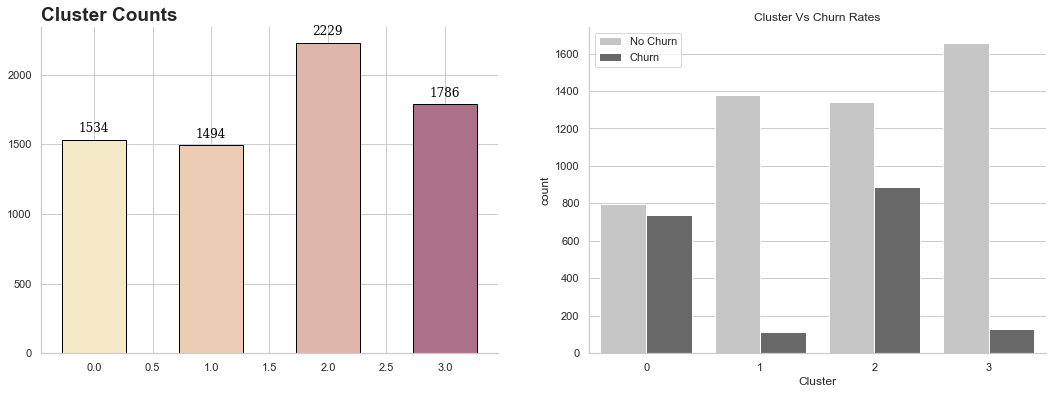

In [41]:
# Cluster Counts
fig, ax = plt.subplots(1,2, figsize=(18, 6))
data_temp = df_cluster['Cluster'].value_counts().sort_index()
ax[0].bar(data_temp.index, data_temp,
          edgecolor='black', color=['#F5E8C7', '#ECCCB2', '#DEB6AB', '#AC7088']
       ,width=0.55 )
ax[0].set_title('Cluster Counts', loc='left', fontsize=19, fontweight='bold')
for i in data_temp.index:
    ax[0].annotate(f"{data_temp[i]}", 
                   xy=(i, data_temp[i] + 80),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='black')
for s in ['top', 'right']:
    ax[0].spines[s].set_visible(False)
    
    
sn.countplot(x='Cluster', hue="Churn", palette="Greys", data=df_cluster)
sn.despine()
plt.legend(title='', loc='upper left', labels=['No Churn', 'Churn'])
plt.title("Cluster Vs Churn Rates")
plt.show()

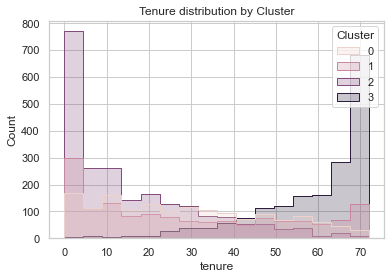

In [42]:
df['Cluster'] = df_cluster['Cluster']
sn.histplot(data=df, x="tenure", hue="Cluster", element="step")
plt.title('Tenure distribution by Cluster')
plt.show()

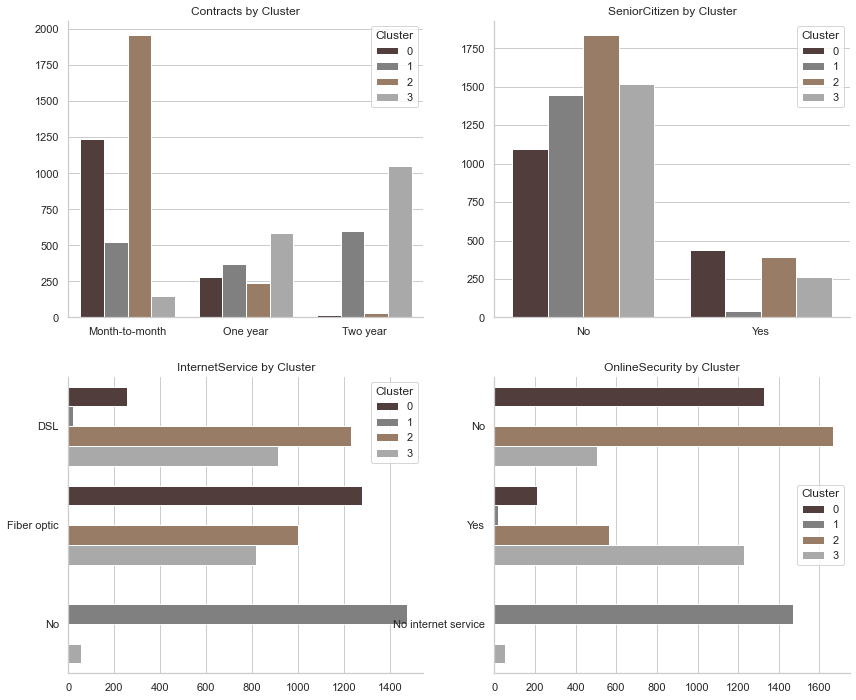

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,12))
sn.despine()

# Gray for No Churn, highlight Churn!
colors = ["#553939", "#808080", "#A27B5C","#A9A9A9"]
# Set custom color palette
sn.set_palette(sn.color_palette(colors))
ax = sn.countplot(x="Contract", hue="Cluster", data=df, ax = axes[0,0]).set(title='Contracts by Cluster', xlabel=None, ylabel = None)
ax = sn.countplot(x="SeniorCitizen", hue="Cluster", data=df, ax = axes[0,1]).set(title='SeniorCitizen by Cluster', xlabel=None, ylabel = None)
ax = sn.countplot(y='InternetService', hue="Cluster", data=df,ax = axes[1,0]).set(title='InternetService by Cluster', xlabel=None, ylabel = None)
ax = sn.countplot(y='OnlineSecurity', hue="Cluster", data=df, ax = axes[1,1]).set(title='OnlineSecurity by Cluster', xlabel=None, ylabel = None)
sn.despine()